In [10]:
from scipy.io import wavfile
from icecream import ic
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
from glob import glob
import os

In [3]:
# filename = '2025-04-12T10:48:25+08:00.wav'
# filename = '2025-04-12T10:40:31+08:00.wav'
# filename = '2025-04-12T14:48:32+08:00.wav'
filename = '2025-04-12T14:48:01+08:00.wav'
sr, data = wavfile.read(filename)
ic(sr)
ic(data)


ic| sr: 48000
ic| data: array([ -5,   0,  -8, ..., -12, -17,  -2], shape=(480000,), dtype=int16)


array([ -5,   0,  -8, ..., -12, -17,  -2], shape=(480000,), dtype=int16)

2025-04-12T14:48:01+08:00.wav


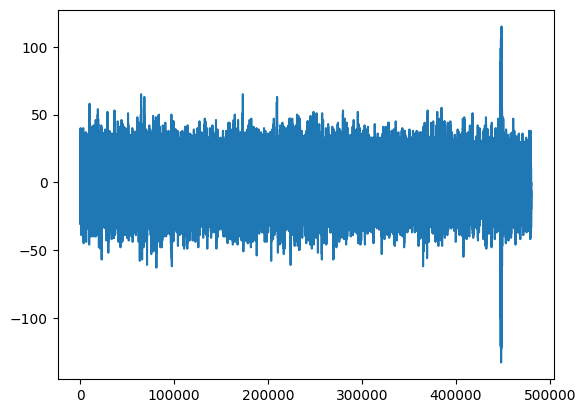

In [4]:
print(filename)
plt.plot(data);

In [5]:
mean = np.mean(data)
std = np.std(data)
height = mean + 5 * std
ic(mean)
ic(std)
ic(height)
ic(np.max(data));

ic| mean: np.float64(

-0.36903541666666667)
ic| std: np.float64(13.391473435657195)
ic| height: np.float64(66.58833176161932)
ic| np.max(data): np.int16(115)


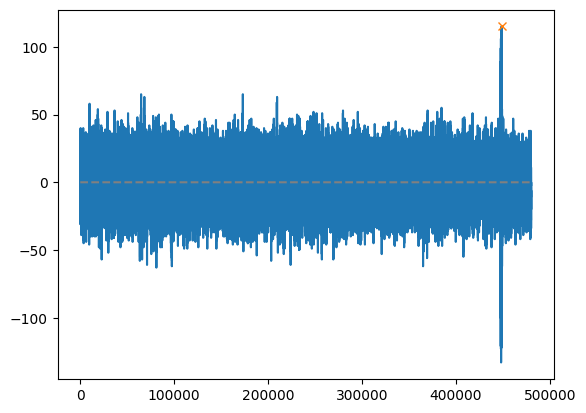

In [6]:

# x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(data, height=height, distance=10000)
plt.plot(data)
plt.plot(peaks, data[peaks], 'x')
plt.plot(np.zeros_like(data), '--', color='gray')
plt.show()


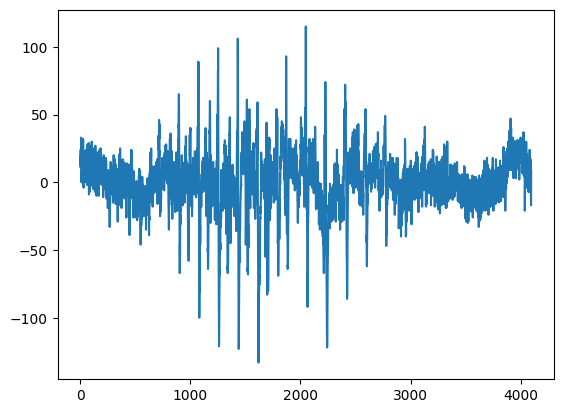

In [7]:
x = peaks[0]
mypeak = data[x-2048 : x+2048]
plt.plot(mypeak)
plt.show()


In [8]:
len(mypeak)

4096

ic| mean: np.float64(

-0.37316041666666666)
ic| std: np.float64(13.866182305166044)
ic| height: np.float64(68.95775110916355)
ic| np.max(data): np.int16(149)
ic| mean: np.float64(-0.3776125)
ic| std: np.float64(4.762578132326064)
ic| height: np.float64(23.43527816163032)
ic| np.max(data): np.int16(39)
ic| mean: np.float64(-0.3776145833333333)
ic| std: np.float64(3.082628906705118)
ic| height: np.float64(15.035529950192256)
ic| np.max(data): np.int16(44)
ic| mean: np.float64(-0.37373541666666665)
ic| std: np.float64(2.672248383227563)
ic| height: np.float64(12.987506499471149)
ic| np.max(data): np.int16(33)
ic| mean: np.float64(-0.3776)
ic| std: np.float64(4.444245050999476)
ic| height: np.float64(21.84362525499738)
ic| np.max(data): np.int16(50)
ic| mean: np.float64(-0.3776333333333333)
ic| std: np.float64(3.0189093889828644)
ic| height: np.float64(14.716913611580988)
ic| np.max(data): np.int16(26)
ic| mean: np.float64(-0.37407083333333335)
ic| std: np.float64(3.024508253967242)
ic| height: np.float64(14.74

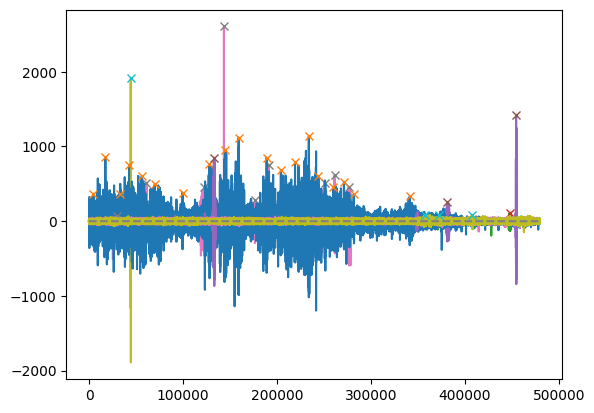

In [16]:
os.makedirs('wavfile_plots', exist_ok=True)
wavfile_names = sorted(glob('wavfiles/*.wav', recursive=True))
for wavfile_name in wavfile_names:
    sr, data = wavfile.read(wavfile_name)
    mean = np.mean(data)
    std = np.std(data)
    height = mean + 5 * std
    ic(mean)
    ic(std)
    ic(height)
    ic(np.max(data))
    
    peaks, _ = find_peaks(data, height=height, distance=10000)
    plt.plot(data)
    plt.plot(peaks, data[peaks], 'x')
    plt.plot(np.zeros_like(data), '--', color='gray')
    
    plotfile = wavfile_name.replace('wavfiles', 'wavfile_plots').replace('.wav', '.png')
    plt.savefig(plotfile);